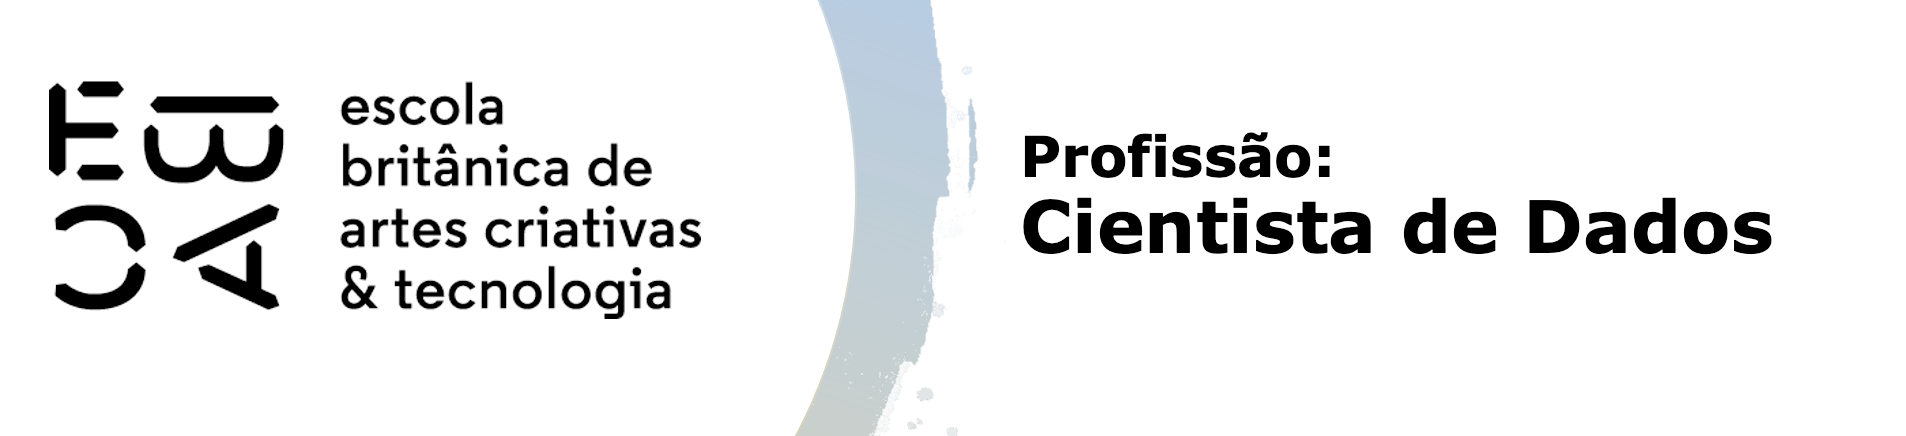

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



df = pd.read_pickle('./Dados/base_nfp.pkl')
df.head()

CNPJ emit.                                           Emitente  \
0  03.476.811/0741-98                      DIA BRASIL SOCIEDADE LIMITADA   
1  43.101.310/0001-05                         AUTO POSTO ZANWAL LTDA EPP   
2  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
3  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
4  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   

    No. Data Emissão  Valor NF Data Registro  Créditos Situação do Crédito  \
0   537   2017-06-30     24.68    2017-06-30      0.00            Liberado   
1  2894   2017-06-30     50.00    2017-06-30      0.00            Liberado   
2   699   2017-06-30     27.00    2017-06-30      0.44            Liberado   
3   698   2017-06-30    111.50    2017-06-30      1.81            Liberado   
4   694   2017-06-30    125.00    2017-06-30      2.03            Liberado   

    Ano  Semestre   Retorno  flag_credito     categoria  
0  2017         1  0.000000             0       Mercado  
1  2017         1  0.000000             0    Auto posto  
2  2017         1  0.016296             1  Restaurantes  
3  2017         1  0.016233             1  Restaurantes  
4  2017         1  0.016240             1  Restaurantes

## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187646 entries, 0 to 187645
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CNPJ emit.           187646 non-null  object        
 1   Emitente             187646 non-null  object        
 2   No.                  187646 non-null  int64         
 3   Data Emissão         187646 non-null  datetime64[ns]
 4   Valor NF             187646 non-null  float64       
 5   Data Registro        187646 non-null  datetime64[ns]
 6   Créditos             187646 non-null  float64       
 7   Situação do Crédito  187646 non-null  category      
 8   Ano                  187646 non-null  int64         
 9   Semestre             187646 non-null  int64         
 10  Retorno              186666 non-null  float64       
 11  flag_credito         187646 non-null  int64         
 12  categoria            187646 non-null  object        
dtypes: category(1)

In [4]:
# Selecionando somente dados acima ou igual a 2020

dados = df.loc[df['Data Emissão'] >= '2020']
dados.head()

CNPJ emit.                                Emitente     No.  \
64598  05.234.750/0001-41                          TX BURGER LTDA   77882   
64599  47.508.411/1476-88          CIA BRASILEIRA DE DISTRIBUICAO   20087   
64600  09.060.964/0108-39            PIMENTA VERDE ALIMENTOS LTDA   82366   
64601  61.412.110/0307-39                  DROGARIA SAO PAULO S A  234178   
64602  46.952.032/0001-98  PANIFICADORA E CONFEITARIA QUELUZ LTDA    3305   

      Data Emissão  Valor NF Data Registro  Créditos Situação do Crédito  \
64598   2020-01-01     78.80    2020-08-01       0.0          A Calcular   
64599   2020-01-01     22.71    2020-01-01       0.0          A Calcular   
64600   2020-01-01     35.90    2020-08-01       0.0          A Calcular   
64601   2020-01-01     21.77    2020-08-01       0.0          A Calcular   
64602   2020-01-01     80.95    2020-08-01       0.0          A Calcular   

        Ano  Semestre  Retorno  flag_credito     categoria  
64598  2019         2      0.0             0  não definido  
64599  2019         2      0.0             0       Mercado  
64600  2019         2      0.0             0     Alimentos  
64601  2019         2      0.0             0      Farmácia  
64602  2019         2      0.0             0  Restaurantes

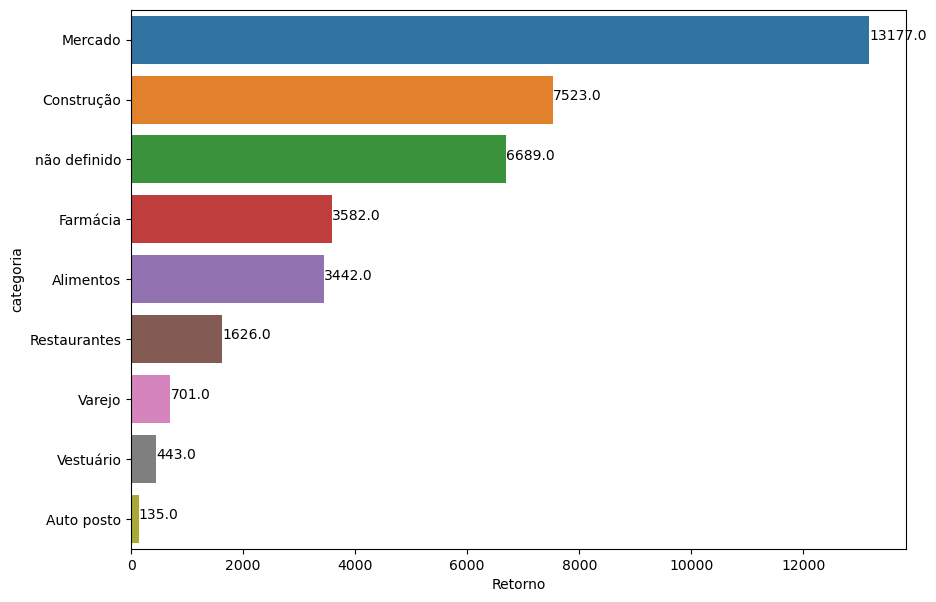

In [5]:
# Criando gráfico para visualizar a quantidade de diferentes categorias por nota.
filtro_1 = dados.loc[dados['Retorno'] > 0].groupby(['categoria'], as_index=False)[['Retorno']].count()
filtro_1 = filtro_1.sort_values(by='Retorno', ascending=False).reset_index(drop=True)
### Plot
plt.figure(figsize=(10,7))

barra = sns.barplot(y = filtro_1.categoria, x = filtro_1.Retorno, orient='h')
for i in barra.patches:
    plt.annotate( i.get_width(), xy=(i.get_width(),i.get_xy()[1] + 0.4))
    

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [62]:
dados_flag = pd.get_dummies(dados, columns=['flag_credito'], dtype=int)
dados_flag = dados_flag.groupby(['categoria'])[['flag_credito_0','flag_credito_1']].sum()
dados_flag.loc['total',:]=dados_flag.sum(0)
dados_flag

flag_credito_0  flag_credito_1
categoria                                   
Alimentos             1608.0          3442.0
Auto posto             405.0           135.0
Construção            8524.0          7523.0
Farmácia              6607.0          3582.0
Mercado              14381.0         13177.0
Restaurantes           553.0          1626.0
Varejo                4365.0           701.0
Vestuário             1477.0           443.0
não definido         11718.0          6689.0
total                49638.0         37318.0

In [74]:
# Calculando o total
dados_flag['eventos'] = dados_flag['flag_credito_0']/dados_flag.loc['total','flag_credito_0']
dados_flag['não_eventos'] = dados_flag['flag_credito_1']/dados_flag.loc['total','flag_credito_1']
dados_flag['odd_rate'] = dados_flag['eventos'] / dados_flag['não_eventos']
dados_flag['WOE'] = np.log(dados_flag['odd_rate'])
dados_flag

flag_credito_0  flag_credito_1  não_eventos   eventos  odd_rate  \
categoria                                                                       
Alimentos             1608.0          3442.0     0.092234  0.032395  0.351220   
Auto posto             405.0           135.0     0.003618  0.008159  2.255409   
Construção            8524.0          7523.0     0.201592  0.171723  0.851837   
Farmácia              6607.0          3582.0     0.095986  0.133104  1.386701   
Mercado              14381.0         13177.0     0.353100  0.289718  0.820496   
Restaurantes           553.0          1626.0     0.043571  0.011141  0.255687   
Varejo                4365.0           701.0     0.018785  0.087937  4.681341   
Vestuário             1477.0           443.0     0.011871  0.029755  2.506576   
não definido         11718.0          6689.0     0.179243  0.236069  1.317032   
total                49638.0         37318.0     1.000000  1.000000  1.000000   

                   WOE  
categoria               
Alimentos    -1.046342  
Auto posto    0.813331  
Construção   -0.160360  
Farmácia      0.326928  
Mercado      -0.197846  
Restaurantes -1.363801  
Varejo        1.543585  
Vestuário     0.918918  
não definido  0.275381  
total         0.000000

In [85]:
woe.index

Index(['Varejo', 'Vestuário', 'Auto posto', 'Farmácia', 'não definido',
       'total', 'Construção', 'Mercado', 'Alimentos', 'Restaurantes'],
      dtype='object', name='categoria')

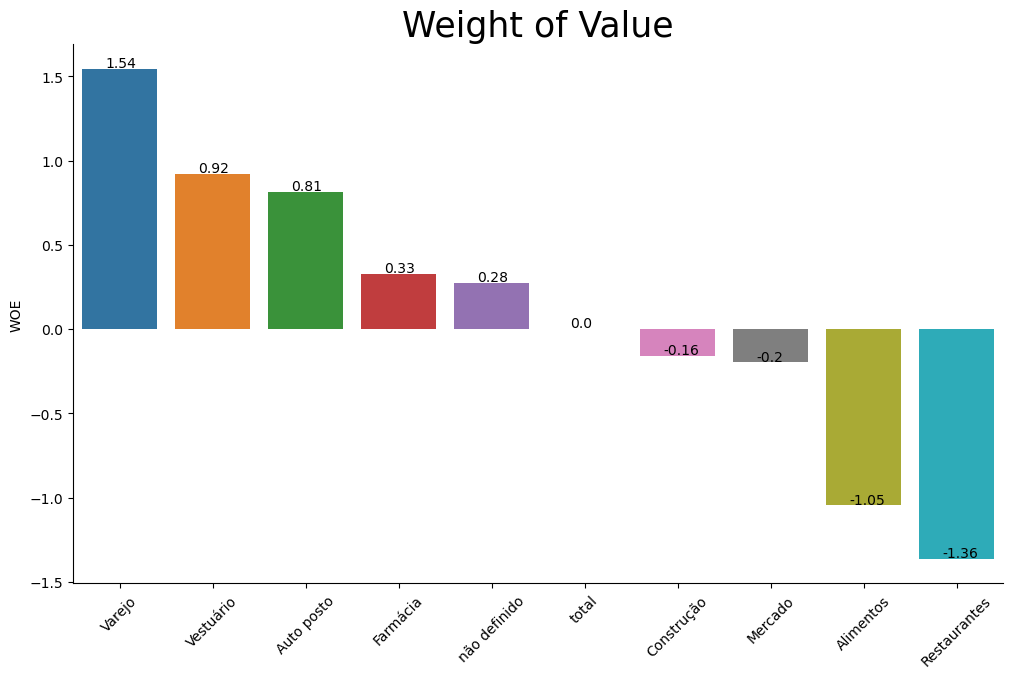

In [122]:
woe = dados_flag[['WOE']].sort_values(by='WOE', ascending=False)
plt.figure(figsize=(12,7))
barra = sns.barplot(x = woe.index.tolist(), y = woe['WOE'], orient='v')
plt.title('Weight of Value', fontsize=25)
for i in barra.patches:
    plt.annotate( round(i.get_height(),2), xy=(i.get_xy()[0] + 0.25 , i.get_height()+0.01))
    
plt.xticks(rotation=45);
barra.spines['top'].set_visible(False)
barra.spines['right'].set_visible(False)

<font color='darkblue'>O gráfico acima ilustra o comportamento do **WOE (Weight of Evidence)** para cada variável do atributo "categoria". Ao examinar a representação visual, conclui-se que as variáveis **varejo, vestuário e autoposto** apresentam uma maior probabilidade de pertencer a classe de eventos em comparação a de não eventos, esse conclusão se da devido aos valores substancialmente mais elevados associados a essas categorias. Na contramão, as variáveis **alimentos e restaurantes** apresentam uma probabilidade maior de pertencer a classe de não eventos do que a de eventos, justamente por seu comportamento ser valores menores.

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [106]:
# Cálculo do IV.
dados_flag['IV'] = (dados_flag['eventos'] - dados_flag['não_eventos'])*dados_flag['WOE']
iv = dados_flag[['IV']].sort_values(by='IV', ascending=False)

In [109]:
iv.style.highlight_between(right=0.02, axis=1, props = 'color:red', subset='IV')

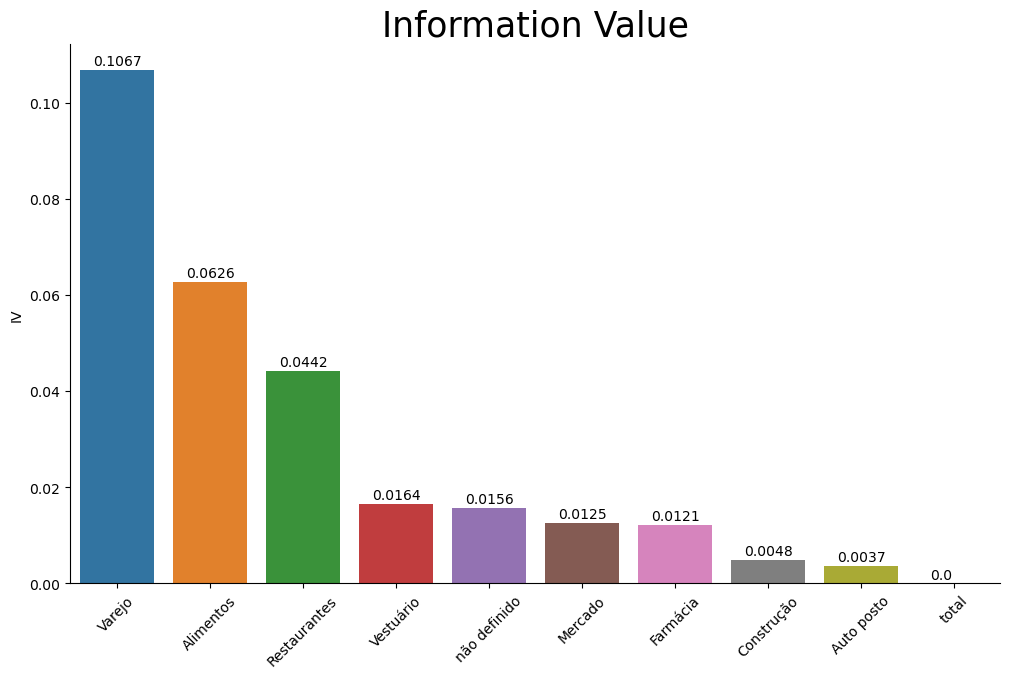

In [124]:
plt.figure(figsize=(12,7))
barra = sns.barplot(x = iv.index.tolist(), y = iv['IV'], orient='v')
plt.title('Information Value', fontsize=25)
for i in barra.patches:
    plt.annotate( round(i.get_height(),4), xy=(i.get_xy()[0] + 0.15 , i.get_height()+ 0.001))
    
plt.xticks(rotation=45);
barra.spines['top'].set_visible(False)
barra.spines['right'].set_visible(False)

## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


<font color='red'>O **Information Value (IV)** é uma medida preditiva muito popular na área de crédito, medindo quanto uma variável é capaz de separar individualmente eventos e não eventos. Sua classificação vai de inútil até forte, se traduz no valores menores que 0.02 como fraco e valores entre 0.3 e 0.5 como forte. A representação visual do IV no formato de Barra demonstra que a maiores é classificada como inútil, exceto as variáveis **Varejo, Alimentos e Restaurantes**  pois já começam a ter uma capacidade considerada fraca.</font>